<a href="https://colab.research.google.com/github/Goldenberg86/liner_regression/blob/main/Liner_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [4]:
df = pd.read_csv('/liner regression.csv')

In [ ]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,22750
3,5.0,8000
4,8.0,9000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   deneyim  14 non-null     float64
 1   maas     14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


In [6]:
df.shape

(14, 2)

In [7]:
df = df.rename(columns = {'deneyim': 'experience (years)', 'maas': 'salary'})


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   experience (years)  14 non-null     float64
 1   salary              14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


In [9]:
df.describe()

,experience (years),salary
count,14.000000,14.000000
mean,6.250000,10207.142857
std,4.979767,6549.423261
min,0.000000,2250.000000
25%,2.250000,6225.000000
50%,5.500000,8250.000000
75%,9.500000,14500.000000
max,15.000000,22750.000000


Text(0, 0.5, 'salary')

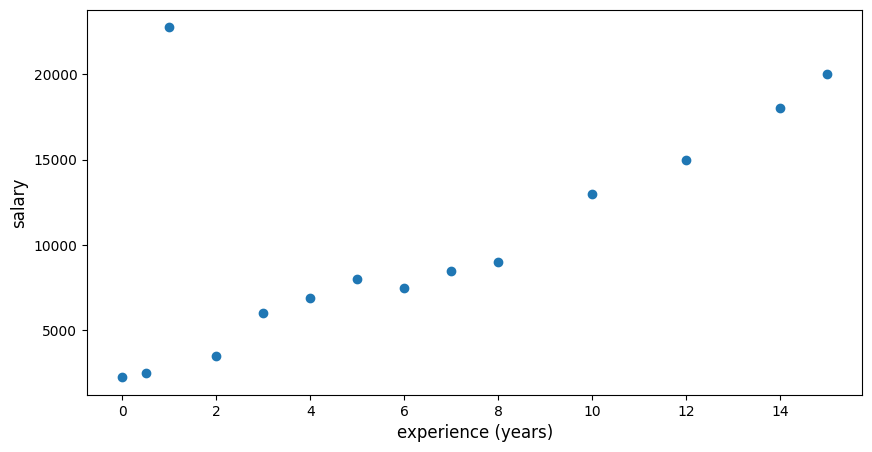

In [10]:
from sqlalchemy import label
fig = plt.figure(figsize= (10, 5))
fig.set_facecolor('w')
ax = fig.add_subplot()
ax = plt.scatter(df['experience (years)'], df['salary'])
plt.xlabel('experience (years)', fontsize = 12)
plt.ylabel('salary', fontsize = 12)

It looks like liner regression here and we see just one outlier. So, let delite it


In [11]:
df.head(14)

,experience (years),salary
0,0.5,2500
1,0.0,2250
2,1.0,22750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


In [12]:
df.drop([2], inplace= True)

Text(0, 0.5, 'salary')

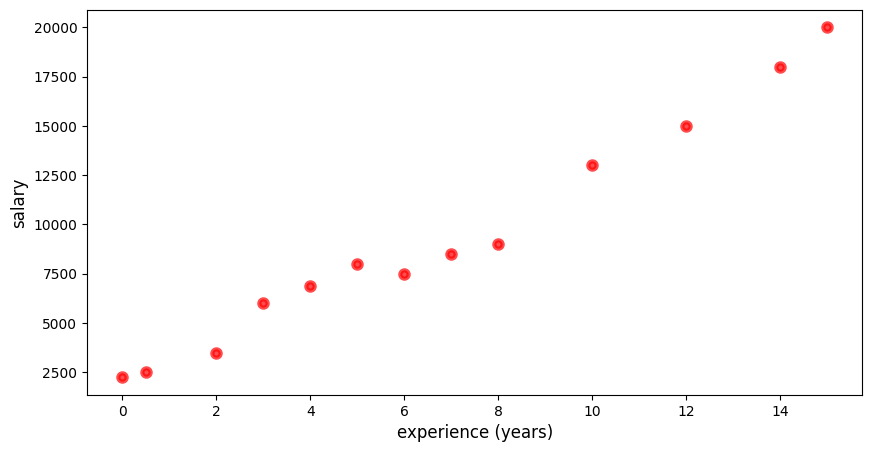

In [13]:
fig = plt.figure(figsize= (10, 5))
fig.set_facecolor('w')
ax = fig.add_subplot()
ax = plt.scatter(df['experience (years)'], df['salary'], color = 'r', linewidths= 3,
                 alpha= 0.7)
plt.xlabel('experience (years)', fontsize = 12)
plt.ylabel('salary', fontsize = 12)


In [14]:
st.correlation(df['experience (years)'], df['salary'])

0.9875581277699205

In [15]:
slope, intercept = st.linear_regression(df['experience (years)'], df['salary'])

In [16]:
slope, intercept

(1137.3390275952695, 1674.6287779237828)

In [17]:
#y = slope * x + intercept

In [18]:
x_line = list(np.array((df['experience (years)'])))

In [19]:
x_line

[0.5, 0.0, 5.0, 8.0, 4.0, 15.0, 7.0, 3.0, 2.0, 12.0, 10.0, 14.0, 6.0]

In [20]:
y_line = [(x_line[i] * slope + intercept) for i in range(len(x_line))]

In [21]:
y_line

[2243.2982917214176,
 1674.6287779237828,
 7361.3239159001305,
 10773.340998685939,
 6223.984888304861,
 18734.714191852825,
 9636.001971090669,
 5086.645860709591,
 3949.3068331143218,
 15322.697109067016,
 13048.019053876478,
 17597.375164257555,
 8498.6629434954]

Text(0, 0.5, 'salary')

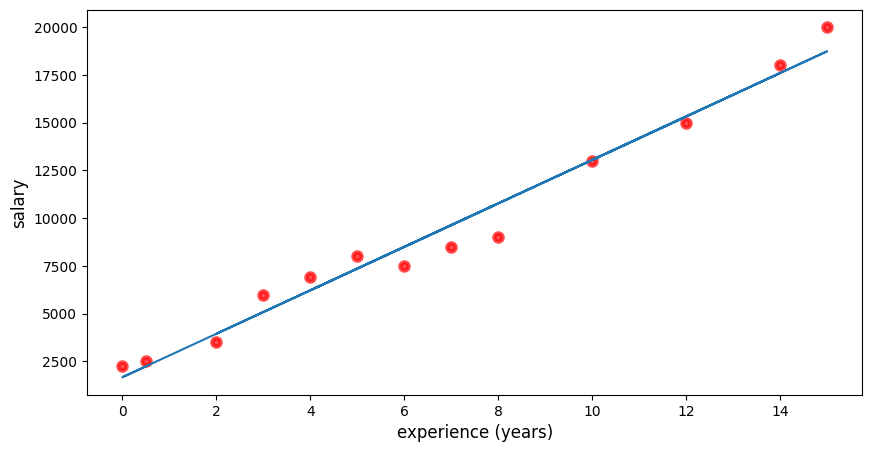

In [22]:
fig = plt.figure(figsize= (10, 5))
fig.set_facecolor('w')
ax = fig.add_subplot()
ax = plt.scatter(df['experience (years)'], df['salary'], color = 'r', linewidths= 3,
                 alpha= 0.7)
plt.plot(x_line, y_line)
plt.xlabel('experience (years)', fontsize = 12)
plt.ylabel('salary', fontsize = 12)

In [25]:
def salary_forecast(x):
  return 1137.3390275952695 * x + 1674.6287779237828

exp = int(input('Years of experience: '))
y = salary_forecast(exp)
print(f'Salary: {y}')

Years of experience: 5
Salary: 7361.3239159001305
